In [ ]:
''' Test plot Curcic & Haus 2020 Cd (lab)'''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys
import xarray as xr
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
sys.path.insert(0, path_nhchi)
from windstr import Cd_e13_CH2020

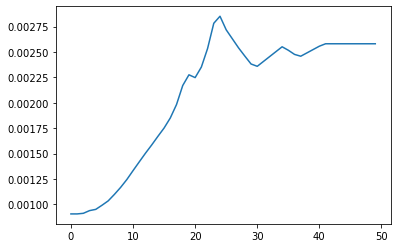

In [5]:
test = Cd_e13_CH2020(np.arange(0,50),np.zeros((50,)))
plt.plot(np.arange(0,50), test)

In [7]:
path = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/check_Cd/Curcic-Haus-2020-1.0.0/data/'
fn = 'asist-windonly-salt.nc'
ds = xr.load_dataset(path+fn)
print(ds)
print(type(ds['U10_momentum_budget']))

<xarray.Dataset>
Dimensions:                              (fan: 13)
Coordinates:
  * fan                                  (fan) float64 0.0 5.0 ... 55.0 60.0
Data variables: (12/33)
    U_irgason                            (fan) float64 0.1708 1.48 ... nan nan
    W_irgason                            (fan) float64 0.00114 -0.001422 ... nan
    U_irgason_error                      (fan) float64 0.0009428 ... nan
    W_irgason_error                      (fan) float64 0.0004714 ... nan
    uw_irgason                           (fan) float64 -0.002494 ... nan
    uw_irgason_error                     (fan) float64 -0.0003378 ... nan
    ...                                   ...
    U10_momentum_budget                  (fan) float64 nan nan ... 36.69 40.72
    U10_momentum_budget_error            (fan) float64 nan nan ... 0.3657 0.3229
    CD_irgason                           (fan) float64 nan nan ... nan nan
    CD_irgason_error                     (fan) float64 nan nan ... nan nan
    CD_mo

Text(0.5, 1.0, 'This study: Drag coefficient in seawater')

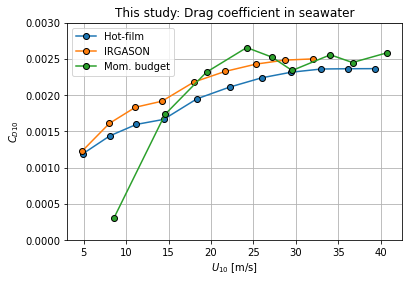

In [6]:
''' plot Cd '''
plt.clf()
plt.plot(ds['U10_hotfilm'], ds['CD_hotfilm'], marker='o', mec='k', label='Hot-film')
plt.plot(ds['U10_irgason'], ds['CD_irgason'], marker='o', mec='k', label='IRGASON')
plt.plot(ds['U10_momentum_budget'], ds['CD_momentum_budget'], marker='o', mec='k', label='Mom. budget')
plt.legend()
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10}$')
plt.ylim(0, 3e-3)
plt.grid()
plt.title('This study: Drag coefficient in seawater')

In [7]:
''' Load Edson et al. (2013), field data '''
e13 = np.loadtxt(path+'edson_etal_2013.txt', skiprows=1)
U10_e13, CD_e13, CD_std_e13 = e13[:,0], e13[:,1], e13[:,2]

Text(0.5, 1.0, 'Edson et al. (2013), field data')

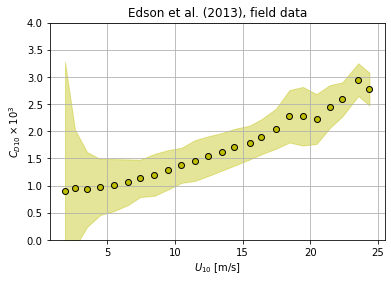

In [8]:
plt.plot(U10_e13, CD_e13, 'yo', mec='k')
plt.fill_between(U10_e13, CD_e13 - CD_std_e13, CD_e13 + CD_std_e13, alpha=0.4, color='y')
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10} \times 10^3$')
plt.ylim(0, 4)
plt.grid()
plt.title('Edson et al. (2013), field data')

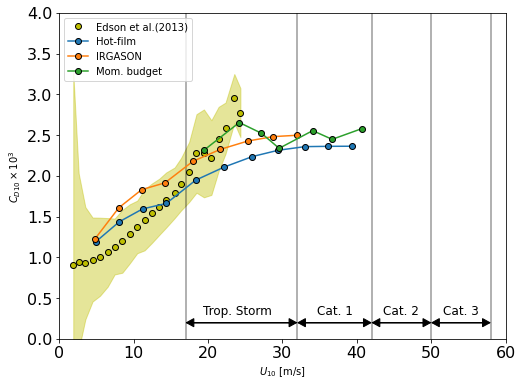

In [19]:
''' Putting Edson et al. (2013) & Curcis and Haus (2020) together '''
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, xlim=(0, 60), ylim=(0, 5))
ax.tick_params(axis='both', labelsize=16)

for wspd in [17, 32, 42, 50, 58]:
    plt.plot([wspd, wspd], [0, 5], 'k-', lw=2, alpha=0.3)

plt.arrow(17.1, 0.2, 14.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(31.9, 0.2, -14.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(32.1, 0.2, 9.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(41.9, 0.2, -9.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(42.1, 0.2, 7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(49.9, 0.2, -7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.arrow(50.1, 0.2, 7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)
plt.arrow(57.9, 0.2, -7.8, 0, color='k', head_length=1, head_width=0.1, length_includes_head=True)

plt.text(24, 0.3, 'Trop. Storm', ha='center', fontsize=12)
plt.text(37, 0.3, 'Cat. 1', ha='center', fontsize=12)
plt.text(46, 0.3, 'Cat. 2', ha='center', fontsize=12)
plt.text(54, 0.3, 'Cat. 3', ha='center', fontsize=12)

# remove high-error momentum budget estimates
ds['CD_momentum_budget'][:6] = np.nan

''' '''
plt.plot(U10_e13, CD_e13, 'yo', mec='k',label='Edson et al.(2013)')
plt.fill_between(U10_e13, CD_e13 - CD_std_e13, CD_e13 + CD_std_e13, alpha=0.4, color='y',label='')
plt.plot(ds['U10_hotfilm'], ds['CD_hotfilm']*1e3, marker='o', mec='k', label='Hot-film')
plt.plot(ds['U10_irgason'], ds['CD_irgason']*1e3, marker='o', mec='k', label='IRGASON')
plt.plot(ds['U10_momentum_budget'], ds['CD_momentum_budget']*1e3, marker='o', mec='k', label='Mom. budget')
plt.xlabel(r'$U_{10}$ [m/s]')
plt.ylabel(r'$C_{D10} \times 10^3$')
plt.ylim(0, 4)
plt.legend()
''' save figure '''
plt.savefig('Cd_Edson-etal2013_Curcic-Haus-2020.png',dpi=400,bbox_inches='tight')

In [15]:
print(ds['CD_momentum_budget'])
print(ds['CD_momentum_budget'][:6])

<xarray.DataArray 'CD_momentum_budget' (fan: 13)>
array([       nan,        nan,        nan,        nan, 0.00030935,
       0.00173215, 0.00231623, 0.00265468, 0.00252283, 0.00233846,
       0.00255516, 0.00244849, 0.0025813 ])
Coordinates:
  * fan      (fan) float64 0.0 5.0 10.0 15.0 20.0 ... 40.0 45.0 50.0 55.0 60.0
Attributes:
    long_name:  Drag coefficient scaled to 10 m height from momentum budget
    units:      1
<xarray.DataArray 'CD_momentum_budget' (fan: 6)>
array([       nan,        nan,        nan,        nan, 0.00030935,
       0.00173215])
Coordinates:
  * fan      (fan) float64 0.0 5.0 10.0 15.0 20.0 25.0
Attributes:
    long_name:  Drag coefficient scaled to 10 m height from momentum budget
    units:      1
